# Experiment 5:
Apply the following on IRIS dataset
1. Find the correlation matrix.
2. Plot the correlation plot on dataset and visualize giving an overview of relationships among data on iris data.
3. Analysis of covariance:variance (ANOVA)



## IRIS dataset info and desc

In [ ]:
from sklearn import datasets
import pandas as pd
iris_df = pd.read_csv('/content/sample_data/Iris.csv')
iris_df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Scatter Plot
Comparison on various species based on Sepal length and width

<Axes: title={'center': 'Comparison on various species based on Sepal length and width'}, xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

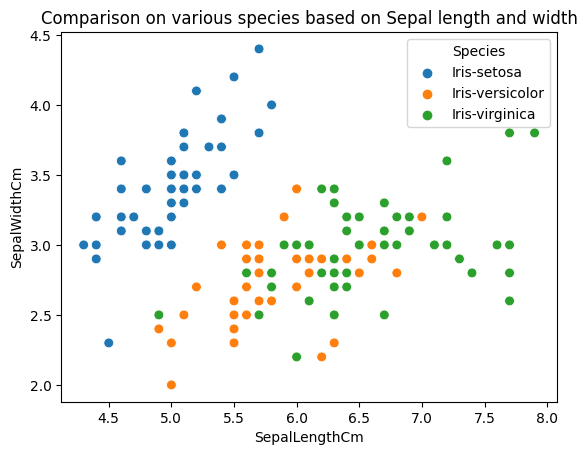

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# scatterplot
plt.title("Comparison on various species based on Sepal length and width")
sns.scatterplot(x=iris_df['SepalLengthCm'], y=iris_df['SepalWidthCm'], hue=iris_df['Species'],s=50)


## Find Correlation Matrix

In [ ]:
# find correlation matrix
iris_corr = iris_df.corr()
print(iris_corr)

                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


<ipython-input-17-c49ef472e656>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris_corr = iris_df.corr()


<Axes: >

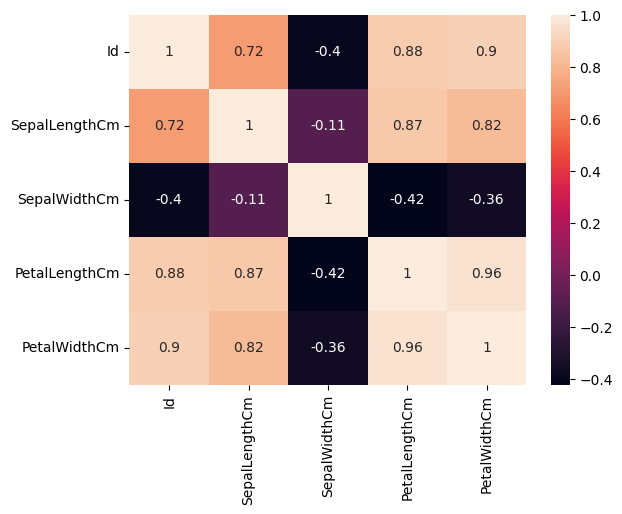

In [ ]:
# Heat Map
sns.heatmap(iris_corr, annot = True)

## ANOVA

## Intro:
**ANOVA - ANalysis Of VAriance** is a parametric statistical technique that helps in finding out if there is a significant difference between the mean of three or more groups.

1. Conditions
- the samples have a normal distribution.
- the samples are selected at random and should be independent of one another.
- all groups have equal standard deviations.


2. One Way ANOVA:
It is a type of hypothesis test where only one factor is considered. We use F-statistic to perform a one-way analysis of variance.

3. Important terms:

 - **F - statistic**: The F-statistic in ANOVA is a ratio of two variances, or technically, two mean squares.  **F-statistic is used to determine whether the variability between group means is larger than the variability of the observations within the groups.** If that ratio is sufficiently large, you can conclude that not all the means are equal.
  - The F-statistic is typically compared to a critical value to determine whether the differences between the groups are statistically significant. The critical value is a value that is based on the significance level of the test and the degrees of freedom.

 - **P - value**: p-value is a measure of the probability of obtaining the observed results, assuming that the null hypothesis is true. The lower the p-value, the more likely it is that the observed results are due to something other than chance.
 In other words, a **p-value is a measure of how surprising the observed results are, given the null hypothesis.**



Steps:
- null hypothesis: H0 -> μ1 = μ2 = μ3 (where μ = mean)
- alternate hypothesis: Ha -> At least one difference among the means
- degrees of freedom (DF) refer to the number of independent values that can be estimated from the sample data.
```
    DF(between) = no. of grps - 1
    DF(within) = total samples in all grps - no. of grps
    DF(total) = DF(between) + DF(within)
```
- find grand mean
```
    Mean(grand) = m1 + m2 + m3/ 3
    where m1, m2, m3 are means of different groups
```
- Sum of Squares:
sum of squares (SS) is a measure of the variation in the data. It is calculated by squaring the difference between each observation and the mean, and then summing the squared differences.
```
    SS(total) = sum(Xi - mean(grand))^2
    SS(within) = sum(Xi - mean(grp i))^2
    SS(between) = SS(total) - SS(within)
```
- Find the variance (μ2 or S2) between and within samples:
```
    S^2(between) = SS(between)/DF(between)
    S^2(within) = SS(within)/DF(within)
```
- Find **f-statistic** or f(calculated):
f- statistic = variance between samples / variance within samples
```
    f-statistic = f(calc) = S^2(between)/S^2(within)
```
- Find f(table):
Refer the F-Distribution table and find f(table) using DF(between) and DF(within).

```
if Fcalc < Ftable :
    Don't reject null hypothesis.
    μ1 = μ2 = μ3
    
if Fcalc > Ftable :
    Reject null hypothesis.

```



In [ ]:
import scipy
from scipy.stats import f_oneway

# Perform ANOVA
# The F-statistic is a ratio of two variances
# p-value is a measure of the probability of obtaining the observed results
f_statistic, p_value = f_oneway(iris_df['SepalLengthCm'], iris_df['SepalWidthCm'], iris_df['PetalWidthCm'])

# Print the results
print("ANOVA RESULTS:\nF-statistic: ", f_statistic)
print("p_value: ", p_value)


ANOVA RESULTS:
F-statistic:  1689.2025076741988
p_value:  4.124083002995293e-209


In [5]:
help(f_oneway)

Help on function f_oneway in module scipy.stats._stats_py:

f_oneway(*samples, axis=0)
    Perform one-way ANOVA.
    
    The one-way ANOVA tests the null hypothesis that two or more groups have
    the same population mean.  The test is applied to samples from two or
    more groups, possibly with differing sizes.
    
    Parameters
    ----------
    sample1, sample2, ... : array_like
        The sample measurements for each group.  There must be at least
        two arguments.  If the arrays are multidimensional, then all the
        dimensions of the array must be the same except for `axis`.
    axis : int, optional
        Axis of the input arrays along which the test is applied.
        Default is 0.
    
    Returns
    -------
    statistic : float
        The computed F statistic of the test.
    pvalue : float
        The associated p-value from the F distribution.
    
    Warns
    -----
    `~scipy.stats.ConstantInputWarning`
        Raised if all values within each of t